In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ml5churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


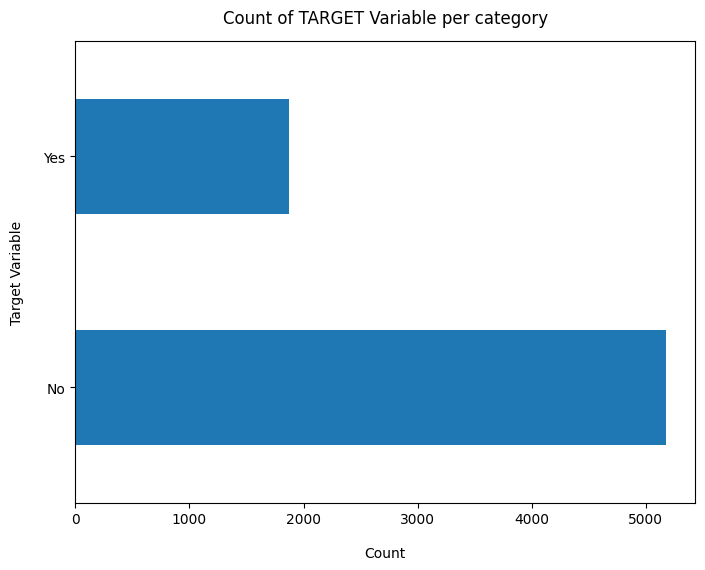

In [6]:
df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [7]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Churn']=le.fit_transform(df['Churn'])


In [9]:
df.drop(columns=['customerID','OnlineSecurity','DeviceProtection','StreamingMovies','PaperlessBilling'],inplace=True)

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,No,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,1


In [11]:
df.drop(columns='tenure', inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,0
2,Male,0,No,No,Yes,No,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,Male,0,No,No,No,No phone service,DSL,No,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,1


univeriate analysis


In [12]:
# for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
#     plt.figure(i)
#     sns.countplot(data=df, x=predictor, hue='Churn')

In [13]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineBackup,TechSupport,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,No,No,No,One year,Mailed check,56.95,1889.5,0
2,Male,0,No,No,Yes,No,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,1
3,Male,0,No,No,No,No phone service,DSL,No,Yes,No,One year,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,Month-to-month,Electronic check,70.70,151.65,1


In [14]:
df_d = pd.get_dummies(df)
df_d.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29.85,0,True,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,56.95,0,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,53.85,1,False,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,42.30,0,False,True,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,70.70,1,True,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
df_d = df_d.astype(int)
df_d.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,56,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,53,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,42,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,70,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


one-hot encoding all categorical varables, but if our values are already in boolean format we use astype



/tmp/ipykernel_18/2606069850.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_d.MonthlyCharges[(df["Churn"] == 0) ],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2606069850.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_d.MonthlyCharges[(df["Churn"] == 1) ],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

Text(0.5, 1.0, 'Monthly charges by churn')

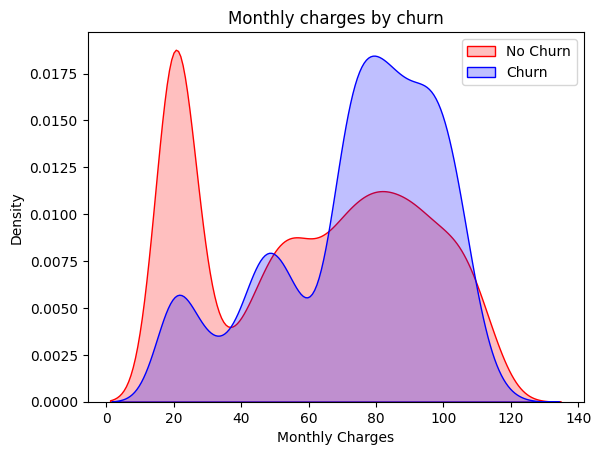

In [16]:
Mth = sns.kdeplot(df_d.MonthlyCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(df_d.MonthlyCharges[(df["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

high monthly charge mean s high churn


In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


/tmp/ipykernel_18/4106689671.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/4106689671.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

Text(0.5, 1.0, 'Total charges by churn')

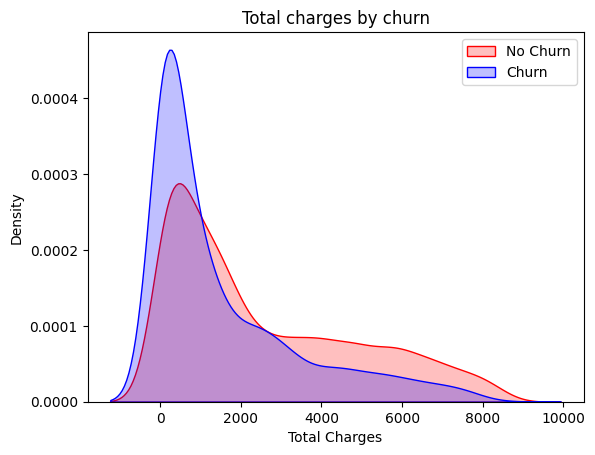

In [18]:
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

as total charge decreases,churn increases, this might n=be due to high montly exp in less tenures.

In [19]:
df_d.head()

,SeniorCitizen,MonthlyCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,29,0,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,56,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,53,1,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,42,0,0,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,70,1,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Bivariete analysis

In [20]:
new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]

In [21]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

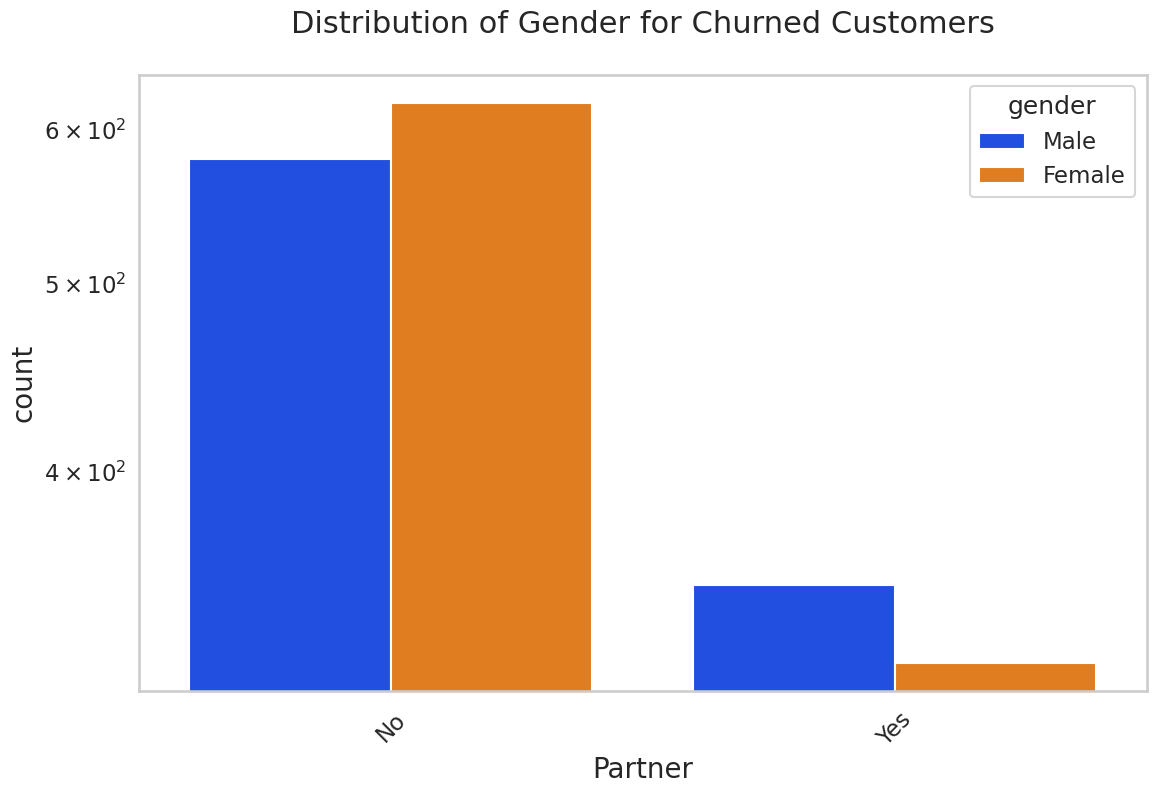

In [22]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

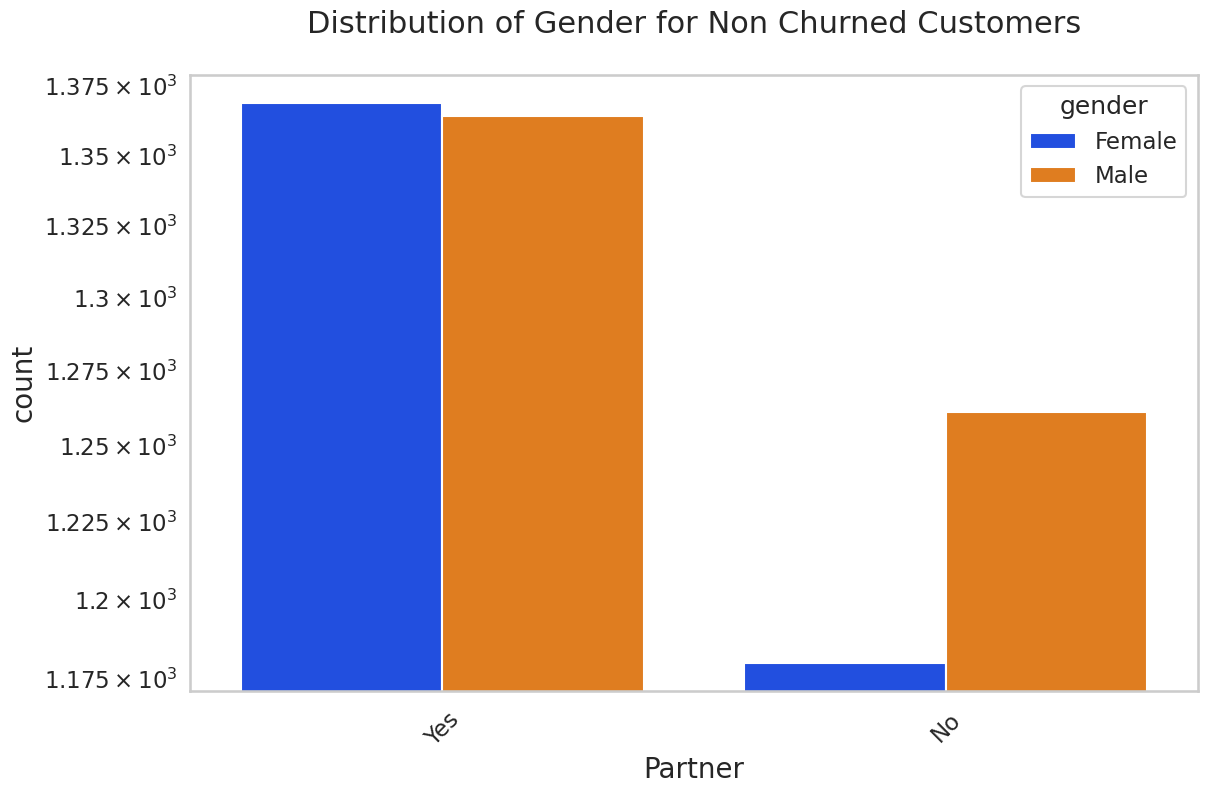

In [23]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

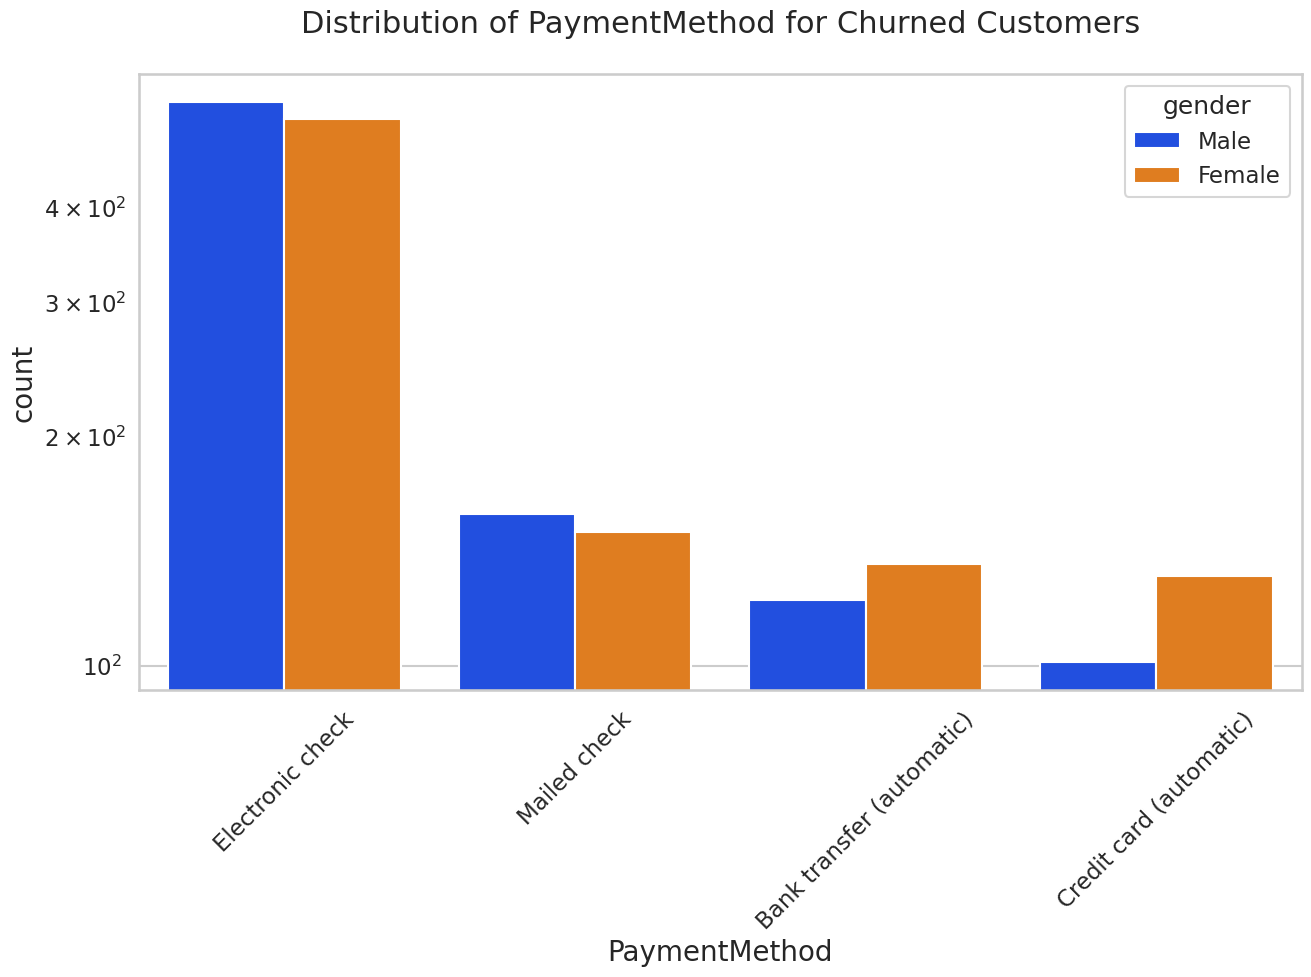

In [24]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

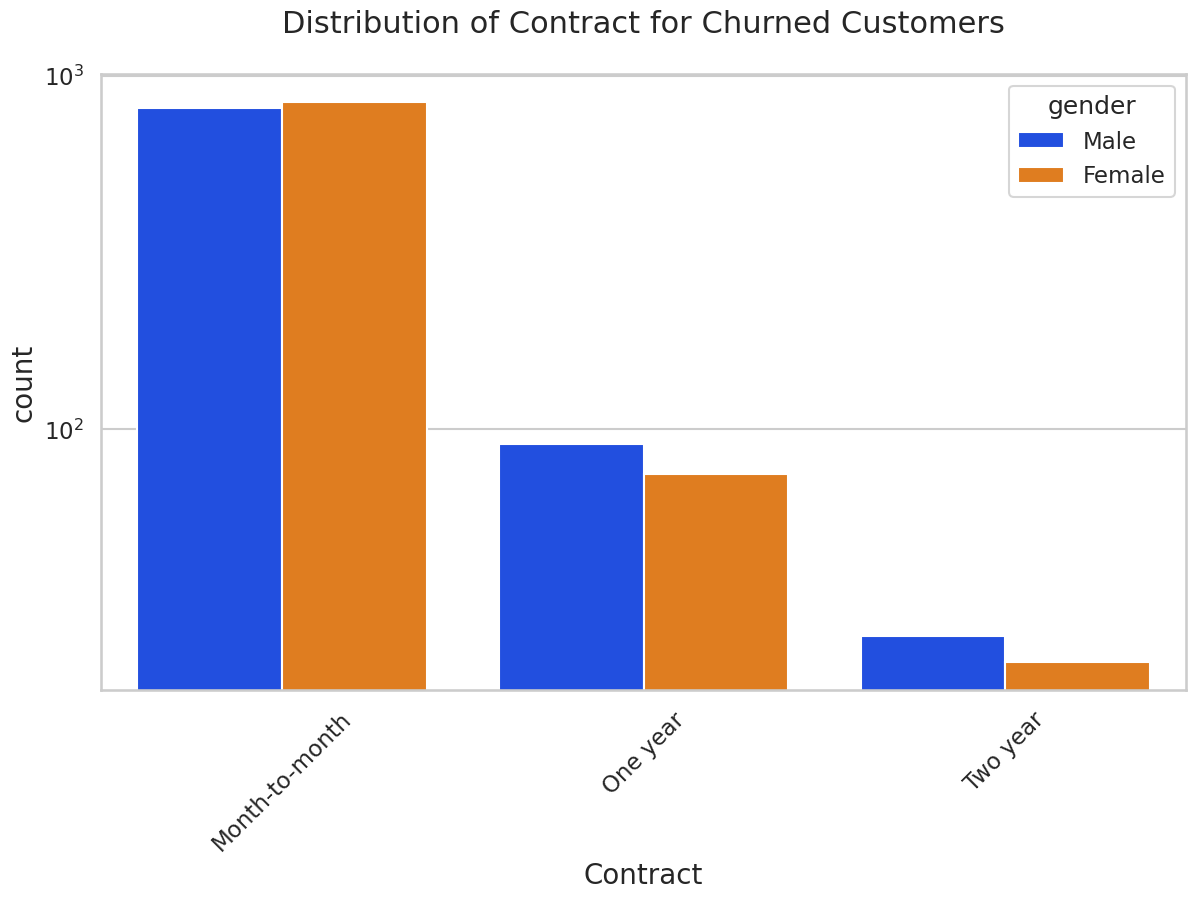

In [25]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

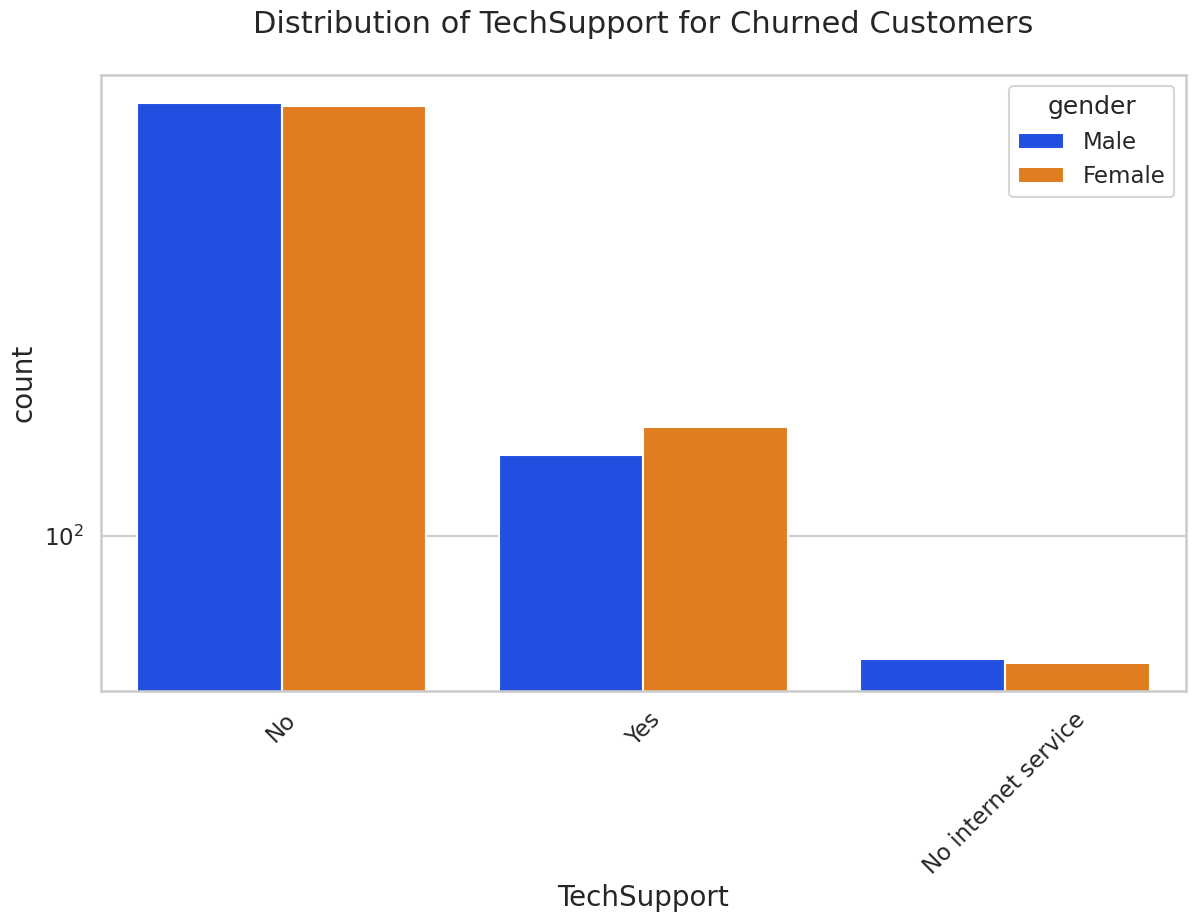

In [26]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

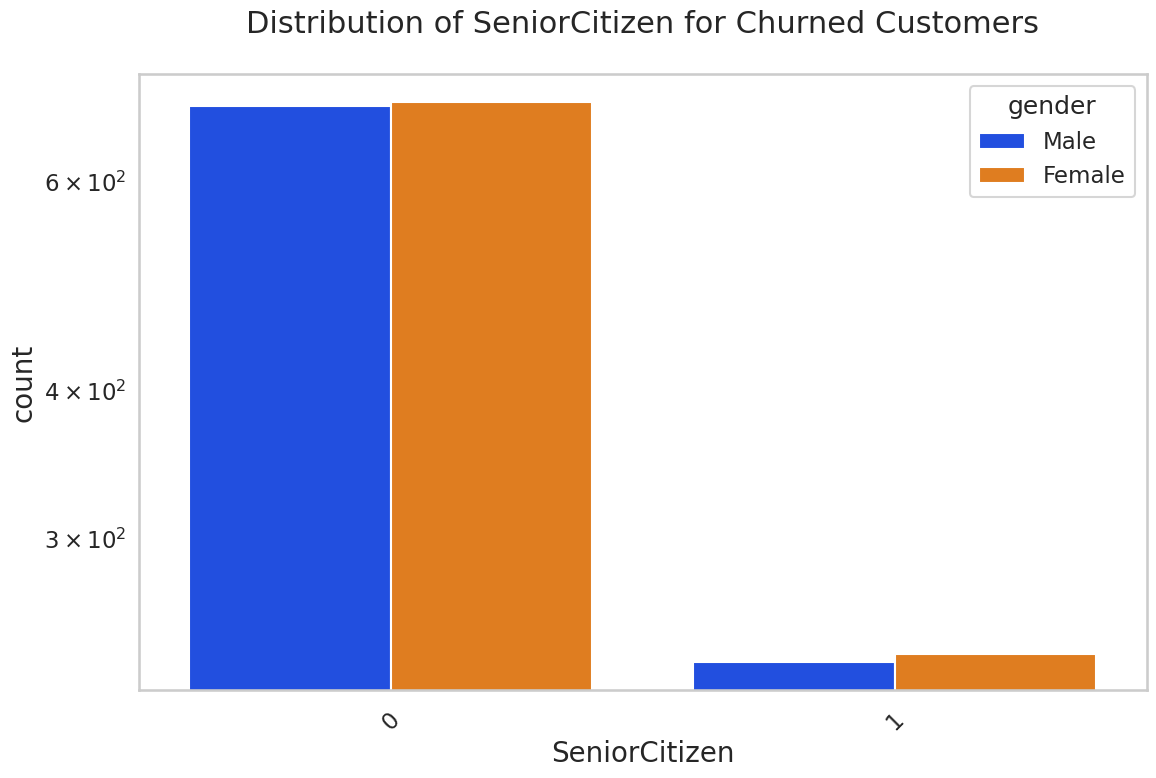

In [27]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

monthly customers are more of a churner. non-senior citizens are more churners.

In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [29]:
x = df_d.drop('Churn',axis=1)

In [30]:
y=df_d['Churn']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [33]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1031
           1       0.57      0.53      0.55       378

    accuracy                           0.77      1409
   macro avg       0.70      0.69      0.70      1409
weighted avg       0.76      0.77      0.77      1409



since precision s import in such unbalanced data, we need either cross validation or upsampling to check or solve this issue

In [35]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [36]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [37]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [38]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9366144668158091
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       459
           1       0.95      0.95      0.95       882

    accuracy                           0.94      1341
   macro avg       0.93      0.93      0.93      1341
weighted avg       0.94      0.94      0.94      1341



precision score has been imorved prooving modelis now performing good.